# Exploring web data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

In [3]:
df_web = pd.read_csv('../../data/raw/web_data.csv')

In [4]:
# df_web.head(2)

In [5]:
'{:,}'.format(len(df_web))

'7,303,620'

In [6]:
df_web.date.dtype

dtype('O')

In [7]:
df_web.iloc[0, :]['date']

'150921-10:02.49'

In [8]:
pd.to_datetime(df_web.iloc[0, :]['date'])

Timestamp('2021-09-15 10:02:29')

In [9]:
pd.to_datetime(df_web.iloc[0, :]['date'], format='%y%m%d-%H:%M.%S')

Timestamp('2015-09-21 10:02:49')

In [10]:
df_web['date'] = pd.to_datetime(df_web['date'], format='%y%m%d-%H:%M.%S')

In [11]:
df_web.date.dtype

dtype('<M8[ns]')

In [12]:
'Unique users:', len(df_web['user'].unique())

('Unique users:', 744)

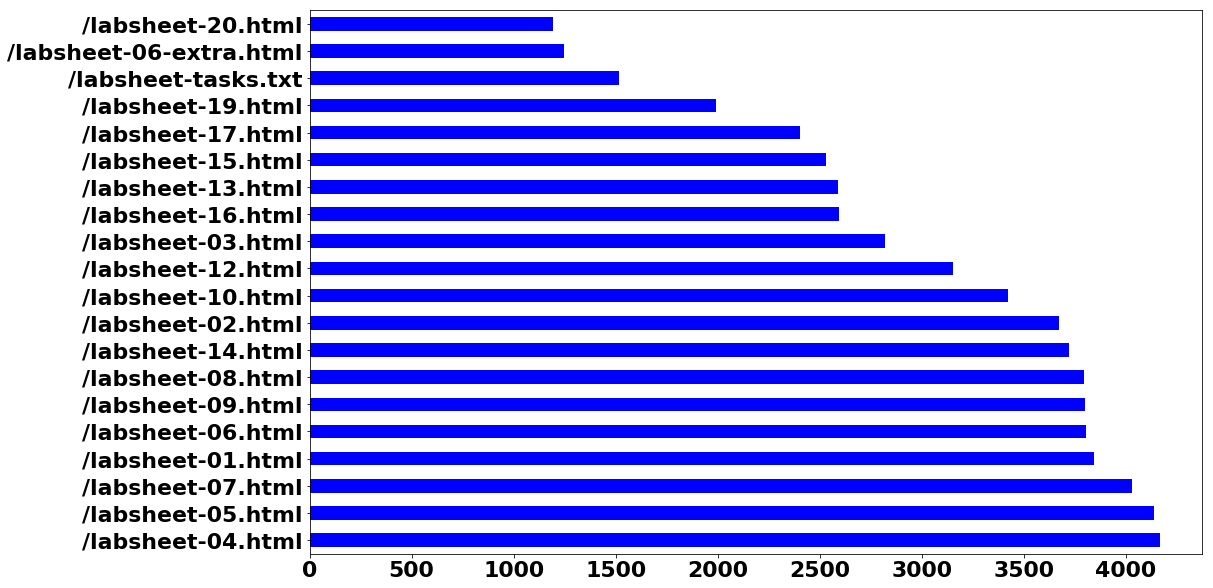

In [13]:
fig = df_web[df_web['resource'].str.contains("labsheet")]['resource'].value_counts().sort_values(
    ascending=False)[:20].plot.barh(figsize=(16, 10), color='b')

In [14]:
fig.get_figure().savefig('../../figures/exploring_LABSHEET.png', bbox_inches="tight")

In [15]:
df_web = df_web[df_web['resource'].str.contains(".html")]

In [16]:
'{:,}'.format(len(df_web))

'232,145'

In [17]:
df_web['resource'].str.split('.').str[0].value_counts()[:10]

/einstein/report            69146
/einstein/task-dashboard    12233
/einstein/graphs             8457
/einstein/navigation         5448
/bucket-list                 4241
/labsheet-04                 4171
/labsheet-05                 4142
/labsheet-07                 4040
/labsheet-01                 3846
/labsheet-06                 3808
Name: resource, dtype: int64

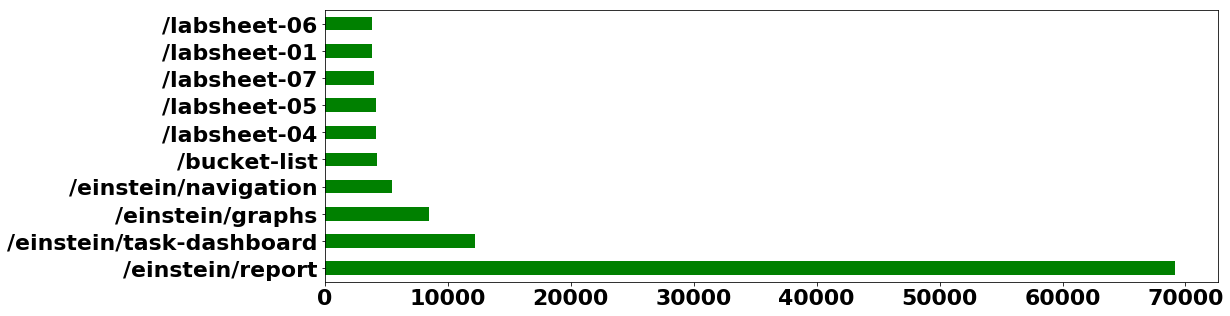

In [18]:
fig = df_web['resource'].str.split('.').str[0].value_counts()[:10].plot.barh(figsize=(16, 5), color='g')

In [19]:
fig.get_figure().savefig('../../figures/exploring_RESOURCE.png', bbox_inches="tight")

In [20]:
df_web['date'].dt.weekday.value_counts(ascending=False)

1    85403
3    76790
2    25288
0    13430
4    12117
6    11309
5     7808
Name: date, dtype: int64

In [21]:
k = df_web['date'].dt.weekday.value_counts(ascending=False)

In [22]:
days = { 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday' }

In [23]:
days.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [24]:
days.values()

dict_values(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [25]:
list(k.index)

[1, 3, 2, 0, 4, 6, 5]

In [26]:
labels = [ days[x] for x in list(k.index) ]

In [27]:
labels

['Monday', 'Wednesday', 'Tuesday', 'Sunday', 'Thursday', 'Saturday', 'Friday']

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Friday')]

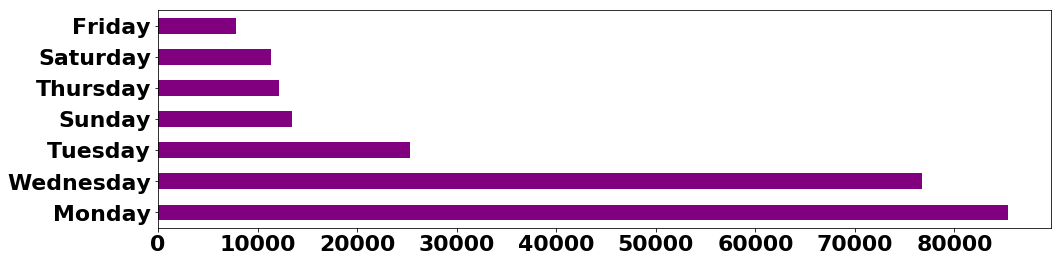

In [28]:
ax = df_web['date'].dt.weekday.value_counts(ascending=False).plot.barh(
    figsize=(16, 4), color='purple')
ax.set_yticklabels(labels, rotation=0)

In [29]:
ax.get_figure().savefig('../../figures/exploring_Day_of_the_Week.png', bbox_inches="tight")

In [30]:
# Weekend?
df_web['date'].dt.weekday.isin([5, 6]).value_counts()

False    213028
True      19117
Name: date, dtype: int64

In [31]:
import datetime

def get_dates():
    dates = df_web['date'].dt.date
    base = dates.min()
    limit = dates.max()
    a = []
    x = base.replace(day=1) # first day of the month
    while x < limit:
        a.append(x)
        x += datetime.timedelta(days=1)
    return a

In [32]:
dates = get_dates()

In [33]:
df_web['date'].dt.date.value_counts()[:2]

2018-09-27    4858
2017-10-10    4026
Name: date, dtype: int64

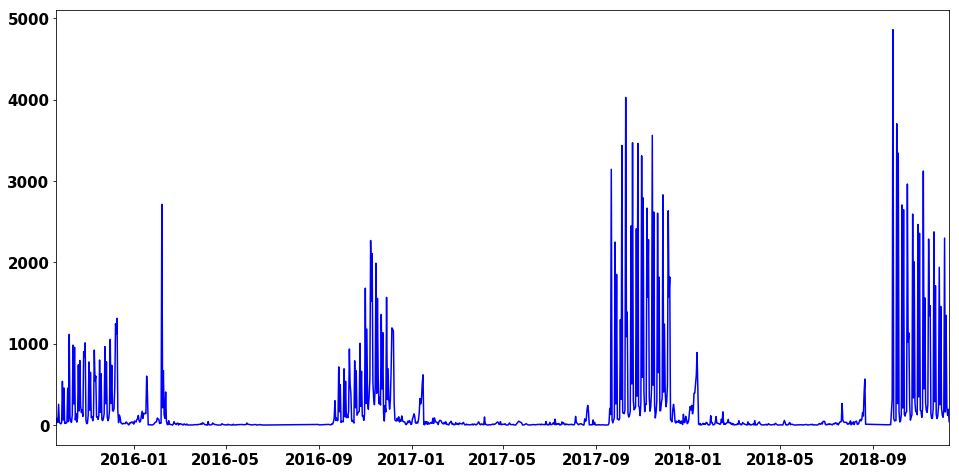

In [34]:
fig = df_web['date'].dt.date.value_counts().plot(figsize=(16, 8), color='b', fontsize=15)

In [35]:
fig.get_figure().savefig('../../figures/exploring_Web_dates.png', bbox_inches="tight")

In [36]:
from datetime import datetime, timedelta

In [37]:
start = datetime(year=2017, month=9, day=1)
end = datetime(year=2018, month=2, day=1)

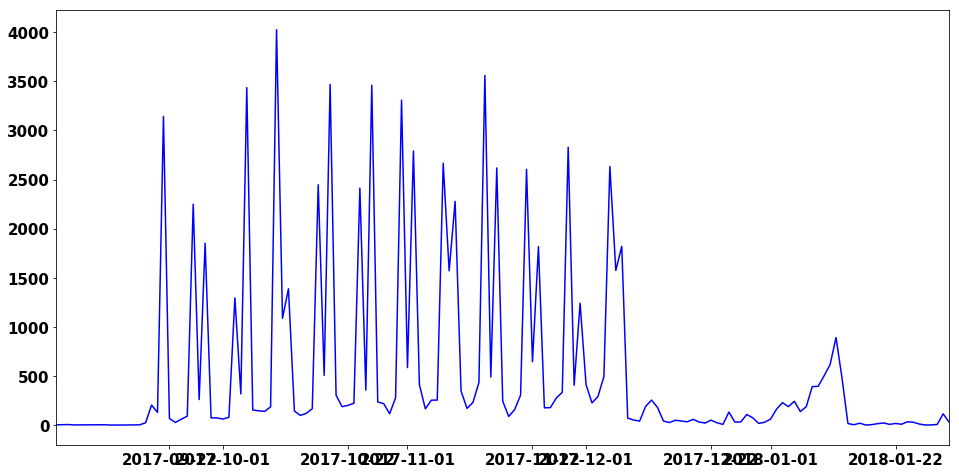

In [38]:
fig = df_web['date'][
    (df_web['date'] > start) & 
    (df_web['date'] < end)].dt.date.value_counts().plot(figsize=(16, 8), color='b', fontsize=15)

In [39]:
fig.get_figure().savefig('../../figures/exploring_Web_dates_2017_2018.png', bbox_inches="tight")

### Utils

In [40]:
t = datetime(year=2017, month=9, day=18)
t += timedelta(weeks=10)

In [41]:
t

datetime.datetime(2017, 11, 27, 0, 0)

In [42]:
p = t + timedelta(weeks=1)

In [43]:
p

datetime.datetime(2017, 12, 4, 0, 0)

In [44]:
end = datetime(year=2017, month=12, day=9)

In [45]:
dataframe = df_web[(df_web['date'] > p) & 
                   (df_web['date'] < end) & 
                   (df_web['resource'].str.contains('.html'))]

In [46]:
uu = sorted([u for u in dataframe.resource.unique() if 'einstein' not in u and 'predictcs' not in u])

In [47]:
uu

['/01-intro.html',
 '/01-intro.web.html',
 '/02-linux.html',
 '/02-linux.web.html',
 '/03-integers.html',
 '/03-integers.web.html',
 '/04-variables.html',
 '/04-variables.web.html',
 '/05-more-types.html',
 '/05-more-types.web.html',
 '/06-if.html',
 '/06-if.web.html',
 '/07-while-1.html',
 '/07-while-2.html',
 '/08-truthiness.html',
 '/09-strings.html',
 '/09-strings.web.html',
 '/10-argv.html',
 '/11-linear-search-notes.html',
 '/12-lists.html',
 '/12-lists.web.html',
 '/14-selection-sort-notes.html',
 '/14-selection-sort-notes.web.html',
 '/14-selection-sort.html',
 '/14-selection-sort.web.html',
 '/15-functions.html',
 '/15-functions.web.html',
 '/16-insertion-sort.html',
 '/16-insertion-sort.web.html',
 '/18-dictionary-notes.html',
 '/19-files.html',
 '/19-files.web.html',
 '/21-bsearch.html',
 '/21-bsearch.web.html',
 '/extra-tasks-04.html',
 '/lab-exam-info.html',
 '/labsheet-01.html',
 '/labsheet-02.html',
 '/labsheet-03.html',
 '/labsheet-04.html',
 '/labsheet-05.html',
 '/lab

In [48]:
# dataframe[dataframe['resource'] == '/21-bsearch.html'].head(20)